In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


'\n| column   | description          | units      |\n|----------|----------------------|------------|\n| ts       | timestamp of event   | epoch      |\n| device   | unique device name   | string     |\n| co       | carbon monoxide      | ppm (%)    |\n| humidity | humidity             | percentage |\n| light    | light detected?      | boolean    |\n| lpg      | liquid petroleum gas | ppm (%)    |\n| motion   | motion detected?     | boolean    |\n| smoke    | smoke                | ppm (%)    |\n| temp     | temperature          | Fahrenheit |\n'

In [ ]:
df = pd.read_csv('iot_telemetry_data.csv')
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [ ]:
df['temp'] = (df['temp']-32) * 5/9

df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,-29.248971
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,-29.763374
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,-29.266118
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,-28.511660
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,-29.266118


In [ ]:
df.corr()

,ts,co,humidity,light,lpg,motion,smoke,temp
ts,1.000000,0.025757,0.017752,-0.020868,0.014178,-0.006911,0.016349,0.074443
co,0.025757,1.000000,-0.656750,-0.230197,0.997331,-0.000706,0.998192,0.110905
humidity,0.017752,-0.656750,1.000000,0.079703,-0.672113,-0.009826,-0.669863,-0.410427
light,-0.020868,-0.230197,0.079703,1.000000,-0.208926,0.033594,-0.212969,0.747485
lpg,0.014178,0.997331,-0.672113,-0.208926,1.000000,0.000232,0.999916,0.136396
motion,-0.006911,-0.000706,-0.009826,0.033594,0.000232,1.000000,0.000062,0.037649
smoke,0.016349,0.998192,-0.669863,-0.212969,0.999916,0.000062,1.000000,0.131891
temp,0.074443,0.110905,-0.410427,0.747485,0.136396,0.037649,0.131891,1.000000


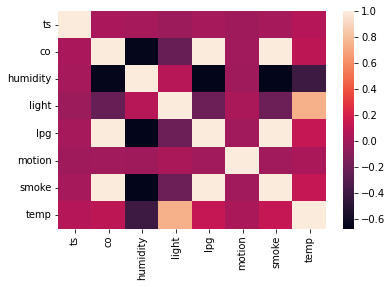

In [ ]:
sns.heatmap(df.corr())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


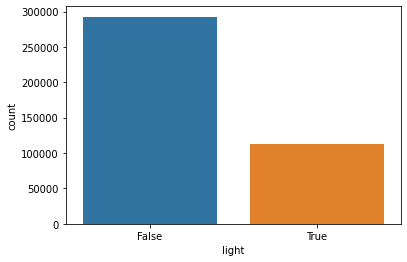

In [ ]:
sns.countplot(df['light'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


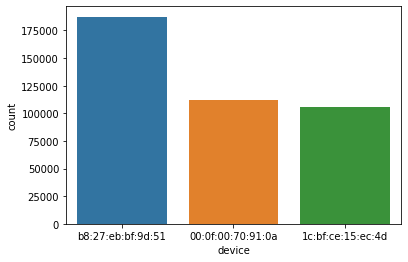

In [ ]:
sns.countplot(df['device'])

In [ ]:
# Data split 
# features: humidity and temp
# target: light

X = df.drop(['ts', 'device', 'lpg', 'light','co', 'motion', 'smoke'], axis=1)
y = df['light']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [ ]:
# K-Nearest Neighbor

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
knn = KNeighborsClassifier()

from sklearn.pipeline import Pipeline
operations = [('scaler',scaler),('knn',knn)]
pipeline = Pipeline(operations)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'knn__n_neighbors': list(range(1,30))}

full_cv_classifier = GridSearchCV(pipeline,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [ ]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=18))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=18),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 18,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Text(0, 0.5, 'Accuracy')

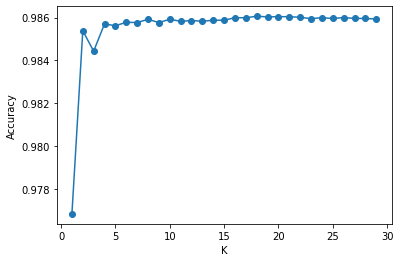

In [ ]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(list(range(1,30)),scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, plot_roc_curve

pred = full_cv_classifier.predict(X_test)

confusion_matrix(y_test,pred)

array([[43881,    31],
       [  765, 16101]])

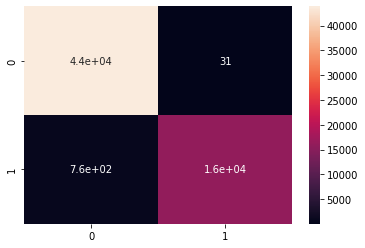

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot = True)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99     43912
        True       1.00      0.95      0.98     16866

    accuracy                           0.99     60778
   macro avg       0.99      0.98      0.98     60778
weighted avg       0.99      0.99      0.99     60778



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


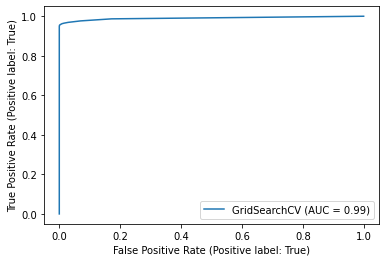

In [ ]:
plot_roc_curve(full_cv_classifier, X_test, y_test)

In [ ]:
# LOGISTIC REGRESSION

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

logmod = LogisticRegressionCV()

logmod.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [ ]:
pred2 = logmod.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve

confusion_matrix(y_test, pred2)

array([[43892,    20],
       [ 1243, 15623]])

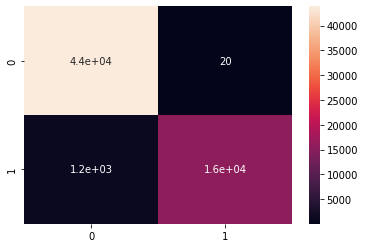

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred2), annot = True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


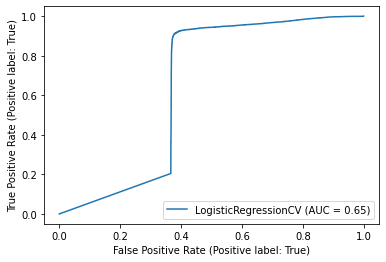

In [ ]:
plot_roc_curve(logmod, X_test, y_test)